In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set()

In [8]:
df = pd.read_csv('data/apple_stock_short.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('B')  # ensure business day frequency
df['Close'] = df['Close'].interpolate()  # safe assignment
df.head()

,Close
Date,
2024-10-04,100.99
2024-10-07,100.11
2024-10-08,102.07
2024-10-09,104.21
2024-10-10,101.08


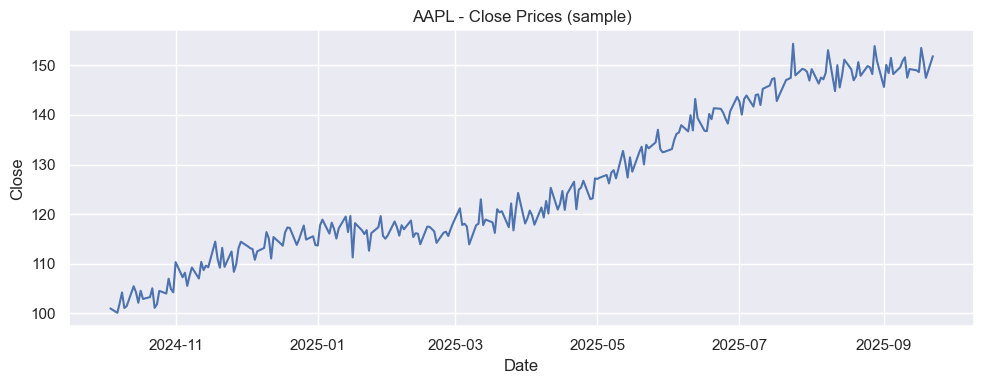

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Close'])
plt.title('AAPL - Close Prices (sample)')
plt.xlabel('Date')
plt.ylabel('Close')
plt.tight_layout()
plt.savefig('screenshots/price_plot.png')
plt.show()

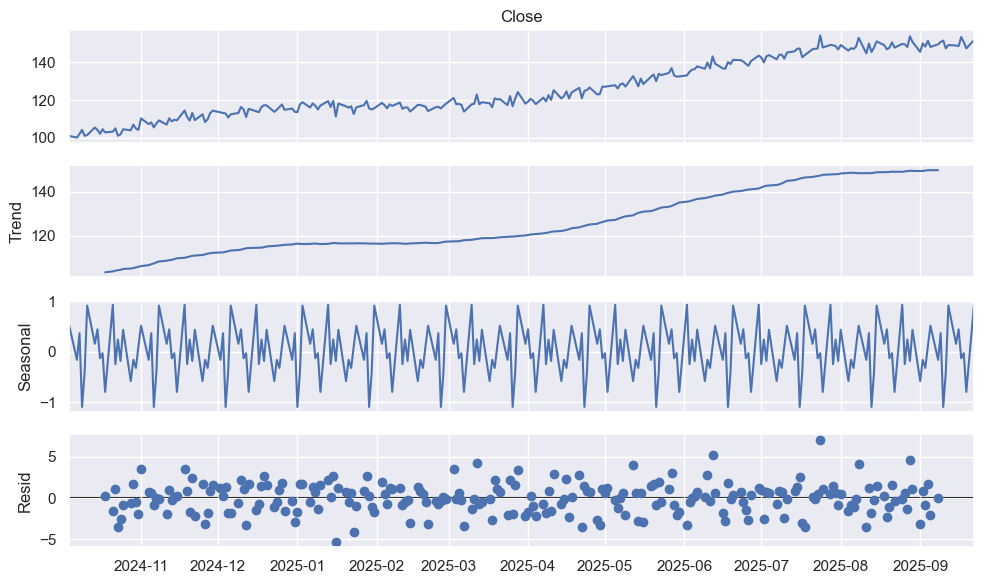

In [10]:
decomp = sm.tsa.seasonal_decompose(df['Close'], model='additive', period=20)
fig = decomp.plot()
fig.set_size_inches(10,6)
plt.tight_layout()
plt.savefig('screenshots/trend_decomposition.png')
plt.show()

In [11]:
result = adfuller(df['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.17540331971292197
p-value: 0.941390672940289


<Figure size 640x480 with 0 Axes>

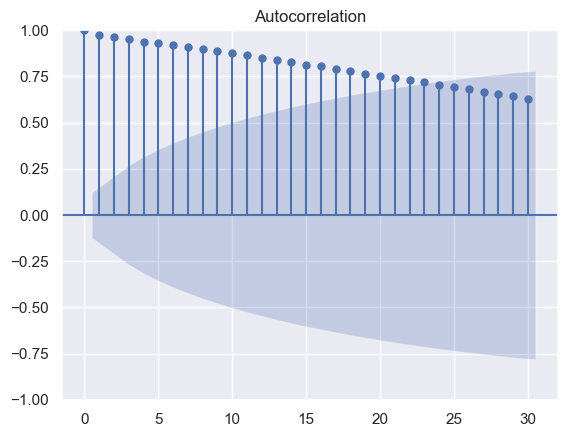

<Figure size 640x480 with 0 Axes>

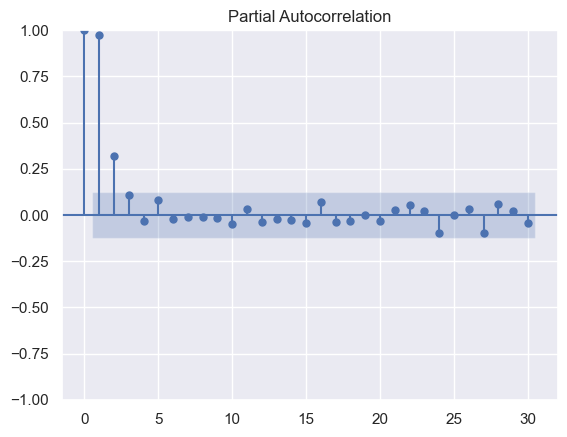

In [12]:
plt.figure(); plot_acf(df['Close'].dropna(), lags=30); plt.savefig('screenshots/acf.png'); plt.show()
plt.figure(); plot_pacf(df['Close'].dropna(), lags=30, method='ywm'); plt.savefig('screenshots/pacf.png'); plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  222
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -492.590
Date:                Mon, 22 Sep 2025   AIC                            991.180
Time:                        21:56:24   BIC                           1001.375
Sample:                    10-04-2024   HQIC                           995.297
                         - 08-11-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1199      0.111     -1.082      0.279      -0.337       0.097
ma.L1         -0.6062      0.088     -6.911      0.000      -0.778      -0.434
sigma2         5.0388      0.467     10.789      0.0

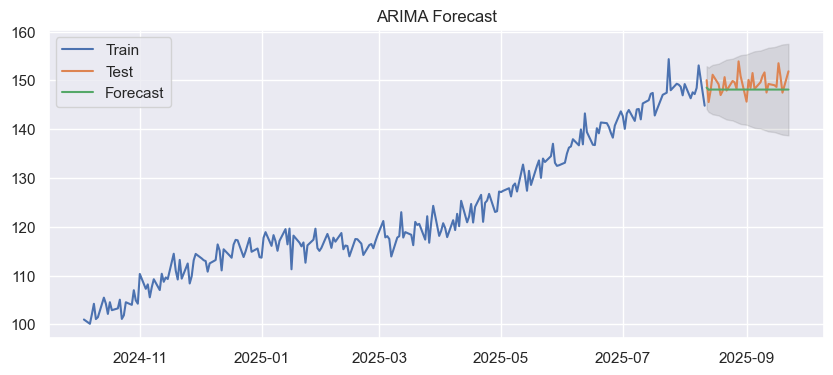

In [7]:
train = df['Close'][:-30]
test = df['Close'][-30:]
model = sm.tsa.ARIMA(train, order=(1,1,1)).fit()
print(model.summary())
fc = model.get_forecast(steps=30)
fc_mean = fc.predicted_mean
ci = fc.conf_int()
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(fc_mean.index, fc_mean, label='Forecast')
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='k', alpha=0.1)
plt.legend()
plt.title('ARIMA Forecast')
plt.savefig('screenshots/forecast.png')
plt.show()